In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import math


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.svm import SVC

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO

In [8]:
iris=load_iris()
x=iris.data
y=iris.target

In [9]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
#can be linear svm or polynomial, change it up depending on the dataset kernel=linear or polynomial
model=SVC()

In [24]:
# you may need to rerun from here if you get an acuracy of 1. 
#Just means you happen to have split your data in a way that works really well for 
#suport vector machines. You can also implement test_size argument to change the proportion of 
#test to train data. Default is 0.3
xtrain, xtest,ytrain,ytest=train_test_split(x,y, test_size=0.35)

In [25]:
model.fit(xtrain,ytrain)

SVC()

In [26]:
predicted=model.predict(xtest)
expected=ytest
print (metrics.accuracy_score(expected,predicted))

0.9245283018867925


In [ ]:
#does a great job

In [27]:
from sklearn import svm
#first 2 columns only in this case
x=iris.data[:,:2]
y=iris.target
c=1.0


In [29]:
#linear
svc=svm.SVC(kernel='linear',C=c).fit(x,y)

In [31]:
#radial basis function
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=c).fit(x,y)

In [32]:
#polynomial, 3rd degree
poly_svc=svm.SVC(kernel='poly',degree=3,C=c).fit(x,y)

In [34]:
#alternative linear model, pretty sure its been depreciated
lin_svc=svm.LinearSVC(C=c).fit(x,y)

/opt/Miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [60]:
#plot these up to see the diference
#step size for mesh
h=0.02 #happens to work here
x_min=x[:,0].min()-1
x_max=x[:,0].max()+1
y_min=x[:,1].min()-1
y_max=x[:,1].max()+1

In [61]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
titles=['SVC linear kernel',
       'LinearSVC',
       'SVC with RBF',
       'SVC with polynomial kernel']

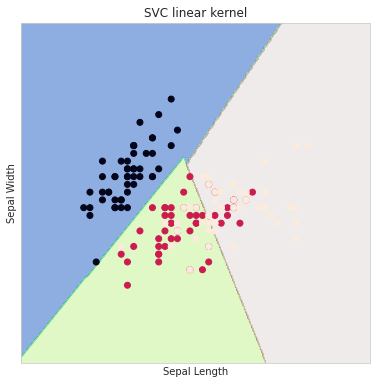

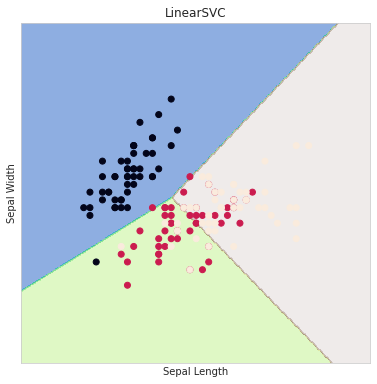

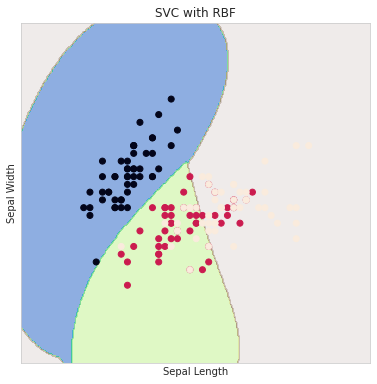

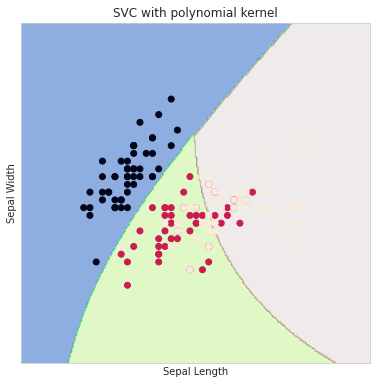

In [62]:
for i, clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    #set the overall figure size
    plt.figure(figsize=(20,20))
    #divide it up into 4 plots, 2 by 2, i being the location in the for loop
    plt.subplot(3,3,i+1)
    #spacing between plots
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    #
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    z=z.reshape(xx.shape)
    
    #filled contour plot
    plt.contourf(xx,yy,z,cmap=plt.cm.terrain,alpha=0.5)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    